# Estimateur des prix de logements d'immobilier :  

## <font color='green'> Objectif du projet :</font>
* Création d'une application mobile permettant, a partir de renseignements donnes par l’utilisateur,d’estimer le prix d’une maison ou d’un appartement.
* Mise en oeuvre la méthode Agile 
* Mise en oeuvre les

## <font color='green' > Import des bibliothèques nécessaires pour le traitement:</font>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 
import seaborn as sns
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# méthodes non linéaires :
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

import time 
import plotly as pl
#stadarisation des données 
from sklearn.preprocessing import StandardScaler

## <font color='green' > Pré-traitement des données:</font>

### Etape 00 : Merge de données construction une version Brut de données 

In [2]:
path = "C:\\Users\\dell\\Downloads\\transactions-ser"
os.chdir(path)

In [3]:
l = []
for file in os.listdir():
    df = pd.read_csv(file,sep=";")
    l.append(df)

In [4]:
#  une version brut de la dataset :
data = pd.concat(l)
data.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0   2022-360375    2022-04-21                   1           Vente   
1   2022-360375    2022-04-21                   1           Vente   
2  2021-1180016    2021-05-10                   1           Vente   
3  2021-1177880    2021-01-14                   1           Vente   
4  2021-1177880    2021-01-14                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe      adresse_nom_voie  \
0         260000.0            26.0            None           RUE DELILLE   
1         260000.0            26.0            None           RUE DELILLE   
2         160000.0            13.0            None  RUE ALFRED DE MUSSET   
3         174000.0            21.0            None     RUE PAUL VERLAINE   
4         174000.0            21.0            None     RUE PAUL VERLAINE   

  adresse_code_voie code_postal  ...  surface_reelle_bati  \
0               582       76800  ...                129.0   
1               582       76800  ...                  NaN   
2                40       76800  ...                 64.0   
3              1920       76800  ...                 64.0   
4              1920       76800  ...                  NaN   

  nombre_pieces_principales  code_nature_culture nature_culture  \
0                       4.0                    S           sols   
1                       0.0                    S           sols   
2                       4.0                    S           sols   
3                       4.0                    S           sols   
4                       0.0                    S           sols   

  code_nature_culture_speciale nature_culture_speciale surface_terrain  \
0                         None                    None           351.0   
1                         None                    None           351.0   
2                         None                    None           452.0   
3                         None                    None           498.0   
4                         None                    None           498.0   

  longitude   latitude section_prefixe  
0  1.071855  49.401886           000AB  
1  1.071855  49.401886           000AB  
2  1.070963  49.402764           000AB  
3  1.070475  49.403622           000AB  
4  1.070475  49.403622           000AB  

[5 rows x 41 columns]

In [5]:
# on garde les mutations qui sont en relation avec les ventes 
data= data[data['nature_mutation']=='Vente']

In [6]:
# vu que touts les biens sont à st étienne du Rouvray on peut enelever les colonnes qui porte sur cette information:
data.drop(['code_commune','code_postal','nom_commune','ancien_code_commune','ancien_nom_commune','code_departement','id_mutation','nature_mutation','adresse_suffixe',"adresse_nom_voie",'id_parcelle','ancien_id_parcelle'], axis=1, inplace=True)

In [7]:
data.drop(['longitude','latitude'],axis=1 ,inplace=True)

In [8]:
#extraction de bdd de vente de Maison :
dataM = data[data['type_local']=='Maison']
dataM 

date_mutation  numero_disposition  valeur_fonciere  adresse_numero  \
0      2022-04-21                   1         260000.0            26.0   
2      2021-05-10                   1         160000.0            13.0   
3      2021-01-14                   1         174000.0            21.0   
7      2019-08-28                   1         180000.0            28.0   
8      2019-06-14                   1         188000.0            38.0   
..            ...                 ...              ...             ...   
228    2017-09-27                   1         225000.0             1.0   
230    2017-09-13                   1         145000.0            27.0   
231    2017-09-08                   1         262500.0             5.0   
232    2017-09-08                   1         130000.0            25.0   
233    2017-09-01                   1         189300.0            20.0   

    adresse_code_voie numero_volume lot1_numero lot1_surface_carrez  \
0                 582          None        None                None   
2                  40          None        None                None   
3                1920          None        None                None   
7                 582          None        None                None   
8                 582          None        None                None   
..                ...           ...         ...                 ...   
228              1335          None        None                 NaN   
230              1420          None        None                 NaN   
231              1335          None        None                 NaN   
232              1420          None        None                 NaN   
233              1870          None        None                 NaN   

    lot2_numero lot2_surface_carrez  ... code_type_local type_local  \
0          None                None  ...               1     Maison   
2          None                None  ...               1     Maison   
3          None                None  ...               1     Maison   
7          None                None  ...               1     Maison   
8          None                None  ...               1     Maison   
..          ...                 ...  ...             ...        ...   
228        None                None  ...               1     Maison   
230        None                None  ...               1     Maison   
231        None                None  ...               1     Maison   
232        None                None  ...               1     Maison   
233        None                None  ...               1     Maison   

    surface_reelle_bati nombre_pieces_principales code_nature_culture  \
0                 129.0                       4.0                   S   
2                  64.0                       4.0                   S   
3                  64.0                       4.0                   S   
7                 108.0                       5.0                   S   
8                  74.0                       5.0                   S   
..                  ...                       ...                 ...   
228               188.0                       6.0                   S   
230                74.0                       5.0                   S   
231               102.0                       5.0                   S   
232                64.0                       4.0                   S   
233                80.0                       4.0                   S   

    nature_culture  code_nature_culture_speciale nature_culture_speciale  \
0             sols                          None                    None   
2             sols                          None                    None   
3             sols                          None                    None   
7             sols                          None                    None   
8             sols                          None                    None   
..             ...                           ...                     ...   


In [9]:
#extraction de bdd de vente de Maison :
dataA = data[data['type_local']=='Appartement']
dataA 

date_mutation  numero_disposition  valeur_fonciere  adresse_numero  \
5      2020-03-10                   1         200000.0             2.0   
12     2018-09-14                   1         820000.0             1.0   
16     2018-06-29                   1         427600.0             2.0   
17     2018-06-29                   1         427600.0             2.0   
18     2018-06-29                   1         427600.0             2.0   
..            ...                 ...              ...             ...   
92     2018-04-11                   1         154900.0             4.0   
204    2018-03-26                   1          50000.0             2.0   
205    2018-03-23                   1          88000.0             2.0   
234    2017-07-07                   1         161000.0             4.0   
14     2018-12-28                   1        1000000.0          9010.0   

    adresse_code_voie numero_volume lot1_numero lot1_surface_carrez  \
5                1580          None        None                None   
12                380          None        None                None   
16                152          None        None                None   
17                152          None        None                None   
18                152          None        None                None   
..                ...           ...         ...                 ...   
92               0780          None           8              141.93   
204              0780          None          46               71.45   
205              0780          None          48               65.48   
234              0780          None           5               143.3   
14               1605          None        None                None   

    lot2_numero lot2_surface_carrez  ... code_type_local   type_local  \
5          None                None  ...               2  Appartement   
12         None                None  ...               2  Appartement   
16         None                None  ...               2  Appartement   
17         None                None  ...               2  Appartement   
18         None                None  ...               2  Appartement   
..          ...                 ...  ...             ...          ...   
92         None                None  ...               2  Appartement   
204        None                None  ...               2  Appartement   
205        None                None  ...               2  Appartement   
234        None                None  ...               2  Appartement   
14         None                None  ...               2  Appartement   

    surface_reelle_bati nombre_pieces_principales code_nature_culture  \
5                  18.0                       1.0                   S   
12                 77.0                       3.0                   S   
16                 30.0                       1.0                   S   
17                 41.0                       2.0                   S   
18                 84.0                       3.0                   S   
..                  ...                       ...                 ...   
92                120.0                       3.0                None   
204                75.0                       3.0                None   
205                65.0                       3.0                None   
234               143.0                       4.0                None   
14                 87.0                       3.0                   S   

    nature_culture  code_nature_culture_speciale nature_culture_speciale  \
5             sols                          None                    None   
12            sols                          None                    None   
16            sols                          None                    None   
17            sols                          None                    None   
18            sols                          None                    None   
..             ...                           ...    

In [10]:
l = [dataM , dataA]
data = pd.concat(l)
data

date_mutation  numero_disposition  valeur_fonciere  adresse_numero  \
0      2022-04-21                   1         260000.0            26.0   
2      2021-05-10                   1         160000.0            13.0   
3      2021-01-14                   1         174000.0            21.0   
7      2019-08-28                   1         180000.0            28.0   
8      2019-06-14                   1         188000.0            38.0   
..            ...                 ...              ...             ...   
92     2018-04-11                   1         154900.0             4.0   
204    2018-03-26                   1          50000.0             2.0   
205    2018-03-23                   1          88000.0             2.0   
234    2017-07-07                   1         161000.0             4.0   
14     2018-12-28                   1        1000000.0          9010.0   

    adresse_code_voie numero_volume lot1_numero lot1_surface_carrez  \
0                 582          None        None                None   
2                  40          None        None                None   
3                1920          None        None                None   
7                 582          None        None                None   
8                 582          None        None                None   
..                ...           ...         ...                 ...   
92               0780          None           8              141.93   
204              0780          None          46               71.45   
205              0780          None          48               65.48   
234              0780          None           5               143.3   
14               1605          None        None                None   

    lot2_numero lot2_surface_carrez  ... code_type_local   type_local  \
0          None                None  ...               1       Maison   
2          None                None  ...               1       Maison   
3          None                None  ...               1       Maison   
7          None                None  ...               1       Maison   
8          None                None  ...               1       Maison   
..          ...                 ...  ...             ...          ...   
92         None                None  ...               2  Appartement   
204        None                None  ...               2  Appartement   
205        None                None  ...               2  Appartement   
234        None                None  ...               2  Appartement   
14         None                None  ...               2  Appartement   

    surface_reelle_bati nombre_pieces_principales code_nature_culture  \
0                 129.0                       4.0                   S   
2                  64.0                       4.0                   S   
3                  64.0                       4.0                   S   
7                 108.0                       5.0                   S   
8                  74.0                       5.0                   S   
..                  ...                       ...                 ...   
92                120.0                       3.0                None   
204                75.0                       3.0                None   
205                65.0                       3.0                None   
234               143.0                       4.0                None   
14                 87.0                       3.0                   S   

    nature_culture  code_nature_culture_speciale nature_culture_speciale  \
0             sols                          None                    None   
2             sols                          None                    None   
3             sols                          None                    None   
7             sols                          None                    None   
8             sols                          None                    None   
..             ...                           ...    

#### Quelques informations sur la dataset:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 14
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_mutation                 1458 non-null   object 
 1   numero_disposition            1458 non-null   int64  
 2   valeur_fonciere               1458 non-null   float64
 3   adresse_numero                1457 non-null   float64
 4   adresse_code_voie             1458 non-null   object 
 5   numero_volume                 1458 non-null   object 
 6   lot1_numero                   1458 non-null   object 
 7   lot1_surface_carrez           692 non-null    object 
 8   lot2_numero                   1458 non-null   object 
 9   lot2_surface_carrez           1092 non-null   object 
 10  lot3_numero                   1458 non-null   object 
 11  lot3_surface_carrez           1143 non-null   object 
 12  lot4_numero                   1458 non-null   object 
 13  lot4_

In [12]:
data.describe()

numero_disposition  valeur_fonciere  adresse_numero  nombre_lots  \
count         1458.000000     1.458000e+03     1457.000000  1458.000000   
mean             1.007545     1.841612e+05      821.060398     0.257202   
std              0.094157     1.748767e+05     2540.075208     0.672302   
min              1.000000     1.000000e+00        1.000000     0.000000   
25%              1.000000     1.000000e+05        7.000000     0.000000   
50%              1.000000     1.550000e+05       19.000000     0.000000   
75%              1.000000     2.050000e+05       49.000000     0.000000   
max              3.000000     3.060533e+06     9110.000000     3.000000   

       surface_reelle_bati  nombre_pieces_principales  surface_terrain  
count          1458.000000                1458.000000      1233.000000  
mean             79.816872                   3.897805       888.387672  
std              30.628938                   1.357198      2673.074726  
min               8.000000                   1.000000        14.000000  
25%              63.000000                   3.000000       222.000000  
50%              78.000000                   4.000000       377.000000  
75%              92.000000                   5.000000       511.000000  
max             250.000000                  22.000000     18847.000000

In [13]:
data.shape 

(1458, 27)

In [14]:
data_Brut = data.copy()

### Vision sur la variation des valeurs foncières: 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


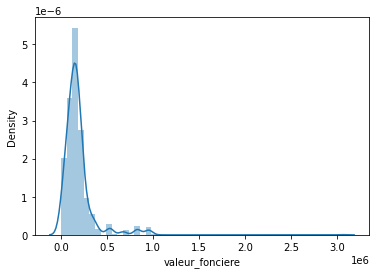

In [15]:
sns.distplot(data["valeur_fonciere"]);
plt.show()

#### pour afficher la distrubution de la variable on peut afficher son log 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


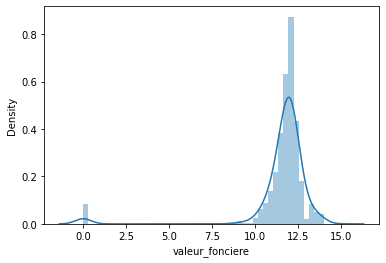

In [16]:
sns.distplot(np.log(data["valeur_fonciere"]))
plt.show()

In [17]:
# Suppression de valeurs aberrantes
data[data['valeur_fonciere']<= 1e6]
pd.unique(data['numero_disposition'])

array([1, 2, 3], dtype=int64)

### Remarque sur les données brutes : 
* Certain données ne sont pas significatives dans notre étude tel que (code postal,commune ,département ....)donc on peut enelever ces information de notre base de données . 
* les données qui ont comme type 'str' (chaine de caractère) ne sont pas exploitable dans notre malgré le fait qu'ils peuvent être  significatives pour l'estimation (nom de la rue par exemple !)---> donc on propose de les rendre numérique ou les binairisés par exemple 
* Vu que l'étude porte sur l'estimation de prix de maisons et d'appartements on garde que les données qui porte sur ces deux types.

In [18]:
type(data['date_mutation'])

pandas.core.series.Series

### Etape 01 : Vision sur les données manquantes /les informations inutiles :

In [19]:
data.isnull().sum().sort_values(ascending=False)[:7] # on affiche jusqu'à la dernière colonnes qui contient des elts null

lot1_surface_carrez    766
lot2_surface_carrez    366
lot3_surface_carrez    315
surface_terrain        225
adresse_numero           1
date_mutation            0
nombre_lots              0
dtype: int64

In [20]:
data.columns

Index(['date_mutation', 'numero_disposition', 'valeur_fonciere',
       'adresse_numero', 'adresse_code_voie', 'numero_volume', 'lot1_numero',
       'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez',
       'lot3_numero', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'nombre_lots', 'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'code_nature_culture_speciale', 'nature_culture_speciale',
       'surface_terrain', 'section_prefixe'],
      dtype='object')

##### suppression des éléments qui n'ont pas de logitude /latitude

In [21]:
data = data.dropna(subset=['adresse_numero'])
data

date_mutation  numero_disposition  valeur_fonciere  adresse_numero  \
0      2022-04-21                   1         260000.0            26.0   
2      2021-05-10                   1         160000.0            13.0   
3      2021-01-14                   1         174000.0            21.0   
7      2019-08-28                   1         180000.0            28.0   
8      2019-06-14                   1         188000.0            38.0   
..            ...                 ...              ...             ...   
92     2018-04-11                   1         154900.0             4.0   
204    2018-03-26                   1          50000.0             2.0   
205    2018-03-23                   1          88000.0             2.0   
234    2017-07-07                   1         161000.0             4.0   
14     2018-12-28                   1        1000000.0          9010.0   

    adresse_code_voie numero_volume lot1_numero lot1_surface_carrez  \
0                 582          None        None                None   
2                  40          None        None                None   
3                1920          None        None                None   
7                 582          None        None                None   
8                 582          None        None                None   
..                ...           ...         ...                 ...   
92               0780          None           8              141.93   
204              0780          None          46               71.45   
205              0780          None          48               65.48   
234              0780          None           5               143.3   
14               1605          None        None                None   

    lot2_numero lot2_surface_carrez  ... code_type_local   type_local  \
0          None                None  ...               1       Maison   
2          None                None  ...               1       Maison   
3          None                None  ...               1       Maison   
7          None                None  ...               1       Maison   
8          None                None  ...               1       Maison   
..          ...                 ...  ...             ...          ...   
92         None                None  ...               2  Appartement   
204        None                None  ...               2  Appartement   
205        None                None  ...               2  Appartement   
234        None                None  ...               2  Appartement   
14         None                None  ...               2  Appartement   

    surface_reelle_bati nombre_pieces_principales code_nature_culture  \
0                 129.0                       4.0                   S   
2                  64.0                       4.0                   S   
3                  64.0                       4.0                   S   
7                 108.0                       5.0                   S   
8                  74.0                       5.0                   S   
..                  ...                       ...                 ...   
92                120.0                       3.0                None   
204                75.0                       3.0                None   
205                65.0                       3.0                None   
234               143.0                       4.0                None   
14                 87.0                       3.0                   S   

    nature_culture  code_nature_culture_speciale nature_culture_speciale  \
0             sols                          None                    None   
2             sols                          None                    None   
3             sols                          None                    None   
7             sols                          None                    None   
8             sols                          None                    None   
..             ...                           ...    

#### Remplacement des surface_reelle_bati par la surface du terrain : 

In [22]:
#il va nous falloir remplacer les valeurs null des cols sinon/on supprime les colonnes correspondantes 
data['surface_terrain'] = data['surface_terrain'].fillna(data['surface_reelle_bati'])

C:\Users\dell\AppData\Local\Temp/ipykernel_17684/1657698222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['surface_terrain'] = data['surface_terrain'].fillna(data['surface_reelle_bati'])


In [23]:
# assurer que toutes les caractéristiques n'ont pas de valeurs nulls 
data.isna().any()

date_mutation                   False
numero_disposition              False
valeur_fonciere                 False
adresse_numero                  False
adresse_code_voie               False
numero_volume                   False
lot1_numero                     False
lot1_surface_carrez              True
lot2_numero                     False
lot2_surface_carrez              True
lot3_numero                     False
lot3_surface_carrez              True
lot4_numero                     False
lot4_surface_carrez             False
lot5_numero                     False
lot5_surface_carrez             False
nombre_lots                     False
code_type_local                 False
type_local                      False
surface_reelle_bati             False
nombre_pieces_principales       False
code_nature_culture             False
nature_culture                  False
code_nature_culture_speciale    False
nature_culture_speciale         False
surface_terrain                 False
section_pref

In [24]:
# reprise des base de données 
dataM = data[data['type_local']=='Maison']
dataA = data[data['type_local']=='Appartement']

In [25]:
# on enlève les colonnes qui contiennent des chaines de caractères 
columns= data.columns
col = [elt for elt in columns if elt not in ["valeur_fonciere"]]
cols = [elt for elt in col if type(pd.unique(data[elt])[0])!= str ]

### Etape 02 : Etude de corrélation entre les colonnes 
cette étape nous permet de visualiser la corrélation entre les différentes caractéristiques 

#### <font color='red'>A/ les appartements :

In [26]:
# division du dataset en 80% pour l'apprentissage,20% pour le test 
xA_train, xA_test, yA_train, yA_test = train_test_split(dataA[cols],dataA["valeur_fonciere"], random_state = 101,test_size=0.2,shuffle=True)

In [27]:
# Matrice de corrélation
corr_matrixA= dataA.corr()
corr_matrixA

numero_disposition  valeur_fonciere  \
numero_disposition                   1.000000        -0.033610   
valeur_fonciere                     -0.033610         1.000000   
adresse_numero                       0.075834        -0.405530   
nombre_lots                          0.002682        -0.541683   
surface_reelle_bati                 -0.005787        -0.244360   
nombre_pieces_principales            0.000732        -0.238445   
surface_terrain                     -0.016703        -0.157307   

                           adresse_numero  nombre_lots  surface_reelle_bati  \
numero_disposition               0.075834     0.002682            -0.005787   
valeur_fonciere                 -0.405530    -0.541683            -0.244360   
adresse_numero                   1.000000     0.385082             0.355072   
nombre_lots                      0.385082     1.000000             0.373137   
surface_reelle_bati              0.355072     0.373137             1.000000   
nombre_pieces_principales        0.334755     0.408612             0.888835   
surface_terrain                 -0.211862    -0.306664             0.022438   

                           nombre_pieces_principales  surface_terrain  
numero_disposition                          0.000732        -0.016703  
valeur_fonciere                            -0.238445        -0.157307  
adresse_numero                              0.334755        -0.211862  
nombre_lots                                 0.408612        -0.306664  
surface_reelle_bati                         0.888835         0.022438  
nombre_pieces_principales                   1.000000        -0.018679  
surface_terrain                            -0.018679         1.000000

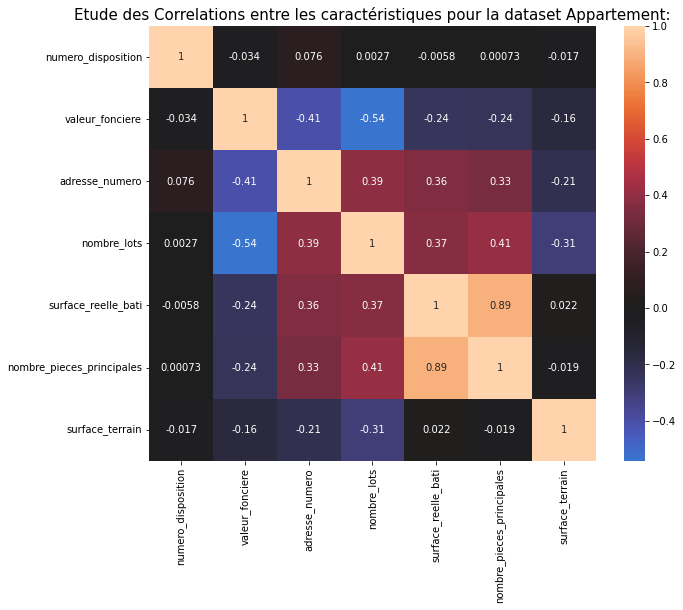

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrixA, annot=True,center = 0)
plt.title("Etude des Correlations entre les caractéristiques pour la dataset Appartement:",fontsize=15)
plt.show()

### Remarques /Analyse : 
* pour faire la regression linéaire on prend en premier les variables ayant une forte corrélation avec la valeur qu'on veut estimer ,et on enlève les features qui ont une forte régression entre eux .
* on enlève toutes les valeurs qui ont une corrélation forte(>0.6) avec la feature 'surface reelle de terrain'--> c'est le  cas de la variable 'nombre de pieces principales '

In [29]:
matA= corr_matrixA["valeur_fonciere"].sort_values(ascending=False)
matA.drop("valeur_fonciere")

numero_disposition          -0.033610
surface_terrain             -0.157307
nombre_pieces_principales   -0.238445
surface_reelle_bati         -0.244360
adresse_numero              -0.405530
nombre_lots                 -0.541683
Name: valeur_fonciere, dtype: float64

In [30]:
# new_data en extractant les colonnes significatives de l'analyse de corrélation :
significant_col = list(corr_matrixA['valeur_fonciere'][(corr_matrixA["valeur_fonciere"] > 0.16) | (corr_matrixA["valeur_fonciere"] < -0.16)].index)
significant_col.remove('valeur_fonciere')
significant_col.remove('adresse_numero')
significant_col.remove('nombre_pieces_principales')
significant_col

['nombre_lots', 'surface_reelle_bati']

In [31]:
# new data :
xA_train = xA_train[significant_col]
# on enlève la feature 'adresse_numero' car corr(adresse_numero , longitude)>0.6
#xA_train.drop('adresse_numero')
xA_train

nombre_lots  surface_reelle_bati
118            1                 27.0
63             0                 63.0
110            0                 62.0
120            2                 82.0
76             1                 92.0
..           ...                  ...
10             0                 73.0
81             2                106.0
95             2                106.0
88             3                 73.0
118            0                 89.0

[313 rows x 2 columns]

In [32]:
xA_test = xA_test[significant_col]


### Mise à l'echelle des données : 

In [33]:
scaler = StandardScaler()
scaler.fit(xA_train)

StandardScaler()

In [34]:
xA_train = scaler.transform(xA_train)
xA_test = scaler.transform(xA_test)

#### <font color='red'>B/ les maisons :

In [35]:
# division du dataset en 80% pour l'apprentissage,20% pour le test 
xM_train, xM_test, yM_train, yM_test = train_test_split(dataM[cols],dataM["valeur_fonciere"], random_state = 101,test_size=0.2,shuffle=True)

In [36]:
# Matrice de corrélation
corr_matrixM= dataM.corr()
corr_matrixM

numero_disposition  valeur_fonciere  \
numero_disposition                   1.000000        -0.038364   
valeur_fonciere                     -0.038364         1.000000   
adresse_numero                      -0.005793        -0.021075   
nombre_lots                         -0.005453         0.062531   
surface_reelle_bati                 -0.034088         0.389384   
nombre_pieces_principales           -0.038384         0.208277   
surface_terrain                     -0.021903         0.196657   

                           adresse_numero  nombre_lots  surface_reelle_bati  \
numero_disposition              -0.005793    -0.005453            -0.034088   
valeur_fonciere                 -0.021075     0.062531             0.389384   
adresse_numero                   1.000000    -0.004052             0.031574   
nombre_lots                     -0.004052     1.000000             0.034341   
surface_reelle_bati              0.031574     0.034341             1.000000   
nombre_pieces_principales        0.020030     0.013095             0.607601   
surface_terrain                  0.027417    -0.012282             0.014675   

                           nombre_pieces_principales  surface_terrain  
numero_disposition                         -0.038384        -0.021903  
valeur_fonciere                             0.208277         0.196657  
adresse_numero                              0.020030         0.027417  
nombre_lots                                 0.013095        -0.012282  
surface_reelle_bati                         0.607601         0.014675  
nombre_pieces_principales                   1.000000        -0.043457  
surface_terrain                            -0.043457         1.000000

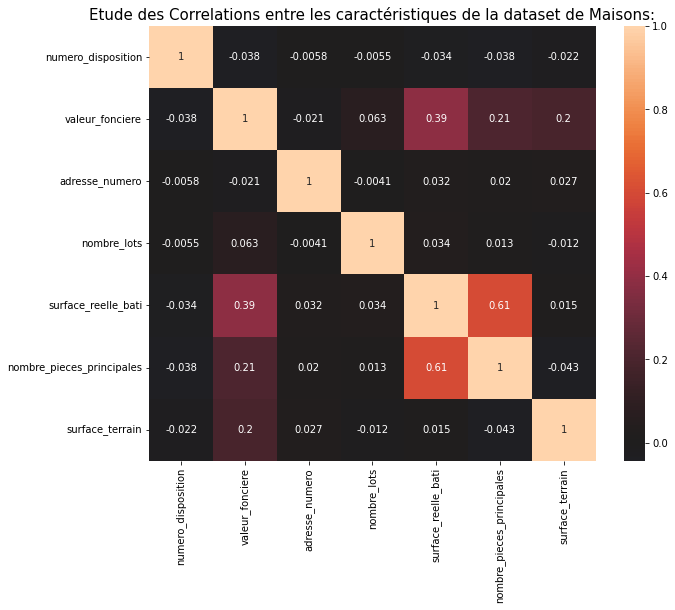

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrixM, annot=True,center = 0)
plt.title("Etude des Correlations entre les caractéristiques de la dataset de Maisons:",fontsize=15)
plt.show()

### Remarques /Analyse : 
* pour cette base de données les features sont plus décorrélées entre eux les coef de corrélation son pas très augmenter donc on change les seuils de décision 
* on décide de garder la variable 'surface réelles du batiment' et on enlève la variable 'nombre de pièces principales' car corr >0.4
* 

In [38]:
matM= corr_matrixM["valeur_fonciere"].sort_values(ascending=False)
matM.drop("valeur_fonciere")

surface_reelle_bati          0.389384
nombre_pieces_principales    0.208277
surface_terrain              0.196657
nombre_lots                  0.062531
adresse_numero              -0.021075
numero_disposition          -0.038364
Name: valeur_fonciere, dtype: float64

In [39]:
significant_col2 = list(corr_matrixM['valeur_fonciere'][(corr_matrixM["valeur_fonciere"] > 0.05) | (corr_matrixM["valeur_fonciere"] < -0.05)].index)
significant_col2.remove('valeur_fonciere')
significant_col2.remove('surface_terrain')
significant_col2

['nombre_lots', 'surface_reelle_bati', 'nombre_pieces_principales']

In [40]:
# new data :
xM_train = xM_train[significant_col2]
xM_train

nombre_lots  surface_reelle_bati  nombre_pieces_principales
99             0                 83.0                        4.0
32             0                225.0                        7.0
54             0                 92.0                        5.0
133            0                120.0                        5.0
150            0                 82.0                        4.0
..           ...                  ...                        ...
60             0                 70.0                        4.0
53             0                132.0                        3.0
115            0                 53.0                        3.0
4              0                 71.0                        4.0
48             0                 77.0                        4.0

[852 rows x 3 columns]

In [41]:
xM_test = xM_test[significant_col2]
xM_test

nombre_lots  surface_reelle_bati  nombre_pieces_principales
131            0                 71.0                        4.0
0              0                 88.0                        4.0
35             0                 81.0                        4.0
42             0                 80.0                        5.0
22             0                 82.0                        5.0
..           ...                  ...                        ...
50             0                 46.0                        3.0
41             0                109.0                        6.0
106            0                147.0                        4.0
32             0                 65.0                        4.0
59             0                113.0                        6.0

[213 rows x 3 columns]

### Machine Learning:

### Regression linéaire:

#### <font color='red'>A/ les Appartements :

In [42]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(xA_train, yA_train)

LinearRegression()

In [43]:
yA_train_predict = lmodellineaire.predict(xA_train)
rmse = (np.sqrt(mean_squared_error(yA_train, yA_train_predict)))
r2 = r2_score(yA_train, yA_train_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 231097.53809258458
le score R2 est 0.2896473361465116




In [45]:
# model evaluation for testing set
yA_test_predict = lmodellineaire.predict(xA_test)
rmse = (np.sqrt(mean_squared_error(yA_test, yA_test_predict)))
r2 = r2_score(yA_test, yA_test_predict)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 244199.18429248
le score R2 est 0.3126087065215555


#### les coeff de corrélation de la régression linéaire sur la première base de données 

In [46]:
#chaque coef correspond à une 
coeff_Appartement = lmodellineaire.coef_
coeff_Appartement

array([-142096.78018782,  -13726.14934169])

In [47]:
res1 = zip(coeff_Appartement,significant_col)
list(res1)

[(-142096.7801878163, 'nombre_lots'),
 (-13726.149341694525, 'surface_reelle_bati')]

#### Visualisation de la régression :

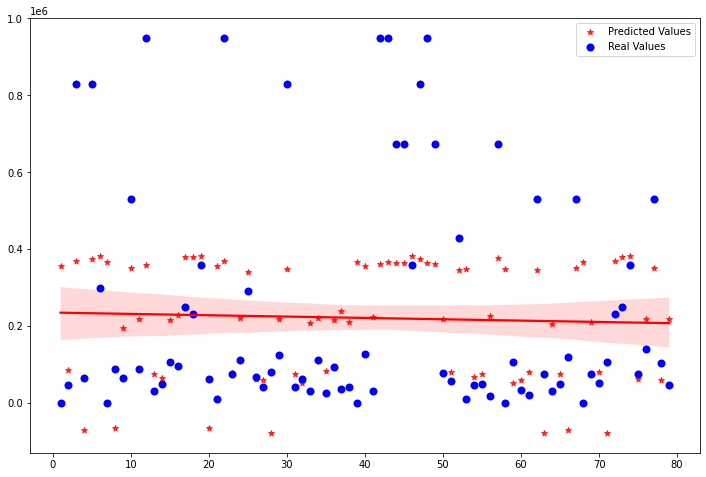

In [48]:
obs = [cpt for cpt in range(1,len(yA_test)+1)]
rentSeriesTest = pd.Series(yA_test.tolist())
obsSeries = pd.Series(obs)

fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(x=obsSeries,y= yA_test_predict,truncate =True,color="red",marker="*",label="Predicted Values")
ax.scatter(obs, rentSeriesTest, color='blue', linewidth=2,label="Real Values")
ax.legend()

### Remarques /Interprétation : 
* On voit bien que les scores sont très faibles (30% ) car les caractéristiques avec les quelles on a estimé notre valeur ils ont une corrélation faibles (la corrélation la plus forte est < 0.6). 

* certains caractéristique tel que (langitude ,latitude ) sont significatives dans notre estimation mais elles sont pas exploitables dans l'application mobile (on ne peut pas demandé à l'utilisateur de saisir la latitude et/ou longitude de son bien ! ).
 

#### <font color='red'>B/ les maisons :

In [49]:
lmodellineaire2 = LinearRegression()
lmodellineaire2.fit(xM_train, yM_train)

LinearRegression()

In [50]:
yM_train_predict = lmodellineaire2.predict(xM_train)
rmse2 = (np.sqrt(mean_squared_error(yM_train, yM_train_predict)))
r22 = r2_score(yM_train, yM_train_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse2))
print('le score R2 est {}'.format(r22))
print('\n')


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 110987.99965559089
le score R2 est 0.13913464858031155




In [51]:
yM_test_predict = lmodellineaire2.predict(xM_test)
rmse2 = (np.sqrt(mean_squared_error(yM_test, yM_test_predict)))
r22 = r2_score(yM_test, yM_test_predict)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse2))
print('le score R2 est {}'.format(r22))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 51115.04758076577
le score R2 est 0.3633652718536584


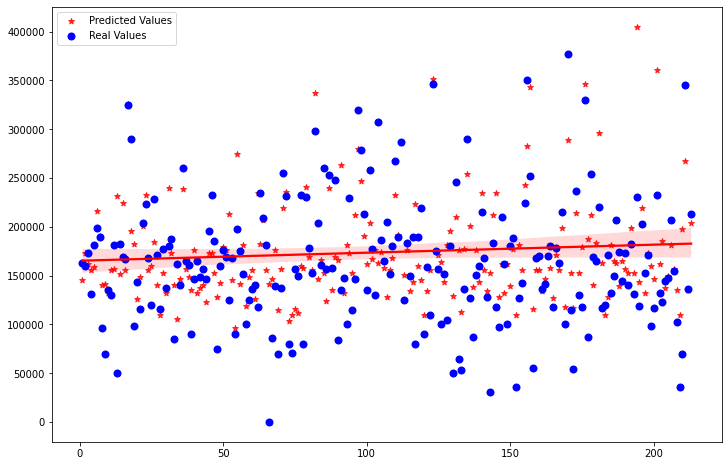

In [52]:
obs = [cpt for cpt in range(1,len(yM_test)+1)]
rentSeriesTest = pd.Series(yM_test.tolist())
obsSeries = pd.Series(obs)

fig, ax = plt.subplots(figsize=(12, 8))

sns.regplot(x=obsSeries,y= yM_test_predict,truncate =True,color="red",marker="*",label="Predicted Values")
ax.scatter(obs, rentSeriesTest, color='blue', linewidth=2,label="Real Values")
ax.legend()

#### les coeff de corrélation de la régression linéaire sur la deuxième base de données 

In [53]:
#chaque coef correspond à une 
coeff_Maison = lmodellineaire2.coef_
coeff_Maison

array([84954.69152477,  1607.78527171, -4428.46206372])

In [54]:
res02 = zip(significant_col2,coeff_Maison)
list(res02)

[('nombre_lots', 84954.69152477442),
 ('surface_reelle_bati', 1607.785271706292),
 ('nombre_pieces_principales', -4428.462063724873)]

### Remarques /Interprétations :
* on a bien vu que les corrélation sont très faibles par rapport à la première base de données (les caractéristiques ne corrèlent pas avec la valeur qu'on veut estimer . 
* comme pour la première base de données certains caractéristique ne sont pas exploitables car l'utilisateur ne pourra pas communiquer de telle information sur l'interface .

### 2/ Regression de Ridge:

 #### <font color='red'>A/ les Appartements :

In [75]:
rid = Ridge(0.2).fit(xA_train, yA_train)
r2_score(yA_test, rid.predict(xA_test))

0.312573961514905

In [68]:
rid.coef_

array([-141596.07987816,  -13861.11349441])

#### <font color='red'>B/ les Maisons :

In [74]:
rid2 = Ridge(0.2).fit(xM_train, yM_train)
r2_score(yM_test, rid2.predict(xM_test))

0.272713531342169

### 3/ Regression de Lasso :

#### <font color='red'>A/ les Appartements :

In [59]:
las1 = Lasso(0.).fit(xA_train, yA_train)
r2 = r2_score(yA_test, las1.predict(xA_test))
r2

0.3126070955054949

In [60]:
las2 = Lasso(5.).fit(xM_train, yM_train)
r2 = r2_score(yM_test, las2.predict(xM_test))
r2

0.36332579229028406

## perspectives :

### les forêts aléatoires :

#### <font color='red'>A/ les Appartements :

In [54]:
start = time.time() 
regressorRFRG = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
# fit the regressor with x and y data

regressorRFRG.fit(xA_train, yA_train)
yTestPred = regressorRFRG.predict(xA_test)

In [55]:
r_squared = r2_score(yTestPred, yA_test)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(yTestPred, yA_test))
print("Log Error:", rmsle)

end = time.time()
print("time:", end - start)

R2 Score: 0.6924997270311825
Log Error: 2.5479690842267004
time: 0.5208032131195068


#### <font color='red'>B/ les maisons :

In [56]:
start = time.time() 
regressorRFRG = RandomForestRegressor(n_estimators = 1000, random_state = 69)
  
# fit the regressor with x and y data

regressorRFRG.fit(xM_train, yM_train)
yTestPred = regressorRFRG.predict(xM_test)

In [57]:
r_squared = r2_score(yTestPred, yM_test)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(yTestPred, yM_test))
print("Log Error:", rmsle)

end = time.time()
print("time:", end - start)

R2 Score: 0.12110711878316416
Log Error: 0.4943351824625889
time: 1.9011292457580566


### GradientBoost Regressor:

#### <font color='red'>A/ les Appartements :

In [58]:
start = time.time() 
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(xA_train, yA_train)
yTestPred = reg.predict(xA_test)


In [59]:
r_squared = r2_score(yTestPred, yA_test)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(yTestPred, yA_test))
print("Log Error:", rmsle)

end = time.time()

print("time", end - start)

R2 Score: 0.5748007334804031
Log Error: 2.943198960997191
time 1.068669319152832


#### <font color='red'>B/ les Maisons :

In [112]:
start = time.time() 
params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(xM_train, yM_train)
yTestPred = reg.predict(xM_test)


In [113]:
r_squared = r2_score(yTestPred, yM_test)

print("R2 Score:", r_squared)
rmsle = np.sqrt(mean_squared_log_error(yTestPred, yM_test))
print("Log Error:", rmsle)

end = time.time()

print("time", end - start)

R2 Score: 0.09123002406329639
Log Error: 0.6094873741903434
time 0.7074427604675293


## Remarque /interprétations : 
* on voit bien que ces méthodes non_linéaires sont plus efficaces/performants  par rapport à la régression 
* on ne peut pas se servir de ce type de modèles sans passer par les API donc ces modèles sans malheureusement pas exploitables dans ce cas . 
